In [2]:
import pandas as pd
import pingouin as pg
import copy

In [3]:
data_path = "../../data/correlation_results.xlsx"
rm_corr_df = pd.read_excel(data_path, sheet_name="log2_rm_corr_p-vals")

In [4]:
rm_corr_df.head()

,Calories,Calories from Alcohol,Carbohydrates (g),Cholesterol (mg),Coffee (fl. oz),Fat (g),Fiber (g),Protein (g),Saturated Fat (g),Sodium (mg),Sugars (g)
2-Aminoadipic acid 3 TMS,0.346114,0.040666,0.660778,0.938215,0.368935,0.661094,0.241725,0.522470,0.659140,0.302596,0.817421
2-Aminobutyric acid 2 TMS,0.323742,0.782639,0.622912,0.591880,0.842743,0.103634,0.785474,0.828976,0.174642,0.620244,0.895229
2-Deoxypentonic acid,0.622862,0.145972,0.613688,0.984463,0.506511,0.474853,0.422829,0.396483,0.420227,0.466468,0.298138
2-Hydroxy-2-methylbutyric acid 2 TMS,0.456520,0.000985,0.241527,0.214096,0.719162,0.431161,0.602501,0.416891,0.232730,0.312489,0.663136
2-Hydroxyglutaric acid 3 TMS,0.823202,0.109155,0.834357,0.066859,0.015137,0.001783,0.134985,0.037263,0.004103,0.106972,0.548968


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2184872b0>,
      dtype=object)

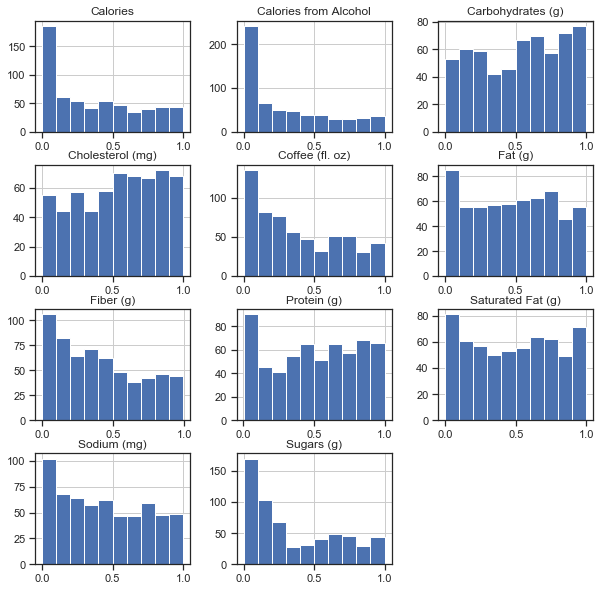

In [5]:
rm_corr_df.hist(figsize=(10,10))

In [6]:
rm_corr_df.columns

Index(['Calories', 'Calories from Alcohol', 'Carbohydrates (g)',
       'Cholesterol (mg)', 'Coffee (fl. oz)', 'Fat (g)', 'Fiber (g)',
       'Protein (g)', 'Saturated Fat (g)', 'Sodium (mg)', 'Sugars (g)'],
      dtype='object')

In [7]:
reject_null, q = pg.fdr(rm_corr_df['Calories'])

In [8]:
len(rm_corr_df[rm_corr_df['Calories'] < 0.05])

144

In [9]:
q

array([0.65630971, 0.63381902, 0.83278493, 0.73201512, 0.94256855,
       0.86463962, 0.13828317, 0.5528457 , 0.22481611, 0.75875611,
       0.04757484, 0.96441925, 0.13412658, 0.95364441, 0.76095482,
       0.70045129, 0.6082931 , 0.59106582, 0.6082931 , 0.74213245,
       0.11012697, 0.19438785, 0.96564189, 0.13412658, 0.02703665,
       0.2352957 , 0.99628229, 0.98524104, 0.53742684, 0.75061622,
       0.82057981, 0.91127397, 0.81586263, 0.13784651, 0.53622285,
       0.55505694, 0.53688727, 0.87592792, 0.96576202, 0.78111183,
       0.96576202, 0.17991414, 0.05042479, 0.78111183, 0.95881212,
       0.01986972, 0.53742684, 0.76553781, 0.79795249, 0.25650748,
       0.68982674, 0.47537685, 0.73562263, 0.96576202, 0.32872342,
       0.68982674, 0.96791628, 0.92194214, 0.73201512, 0.87569648,
       0.96791628, 0.69432472, 0.92194214, 0.0858823 , 0.53742684,
       0.21973325, 0.83044578, 0.96441925, 0.73201512, 0.67650896,
       0.86235787, 0.53622285, 0.69281732, 0.02703665, 0.78111

In [10]:
pass_count = 0
for count,q_val in enumerate(q):
    p_val = round(rm_corr_df['Calories'].iloc[count],5)
    metabolite = rm_corr_df.iloc[count].name
    if q_val < 0.05:
        pass_count += 1
        print(metabolite,p_val,round(q_val,5))
print(pass_count)

3-Methyladipic acid 2 TMS 0.00296 0.04757
Adenine 2 TMS 0.00059 0.02704
Carbohydrate 19 0.0002 0.01987
Gamma Aminobutyric acid 3 TMS 0.00047 0.02704
Guanine 3 TMS 0.00339 0.04757
Threonic acid 3 TMS 0.00297 0.04757
Thymine 2 TMS 4e-05 0.01334
unknown RT 11.098425 0.0029 0.04757
unknown RT 11.3766 0.00338 0.04757
unknown RT 12.094886 0.00105 0.03517
unknown RT 15.244624 0.00177 0.04587
unknown RT 15.689507 0.00239 0.04757
unknown RT 16.036115 0.00259 0.04757
unknown RT 16.281569 0.00183 0.04587
unknown RT 16.40641 0.00311 0.04757
unknown RT 16.528409 0.00173 0.04587
unknown RT 16.585281 0.00173 0.04587
unknown RT 16.648432 0.00056 0.02704
unknown RT 17.185752 0.0002 0.01987
unknown RT 17.697377 0.0006 0.02704
unknown RT 17.738093 0.00127 0.04025
unknown RT 17.990869 0.00278 0.04757
unknown RT 18.026567 8e-05 0.0151
unknown RT 18.045242 0.00254 0.04757
unknown RT 18.196947 0.0009 0.03369
unknown RT 18.42891 0.00271 0.04757
unknown RT 18.657689 0.00258 0.04757
unknown RT 19.018999 1e-05 0

In [11]:
from statsmodels.stats.multitest import multipletests
rm_corr_qval_df = copy.deepcopy(rm_corr_df)
for column in rm_corr_df.columns:
    #m_corr_qval_df[column] = pg.fdr(rm_corr_df[column])[1]
    rm_corr_qval_df[column] = multipletests(rm_corr_df[column], method='fdr_bh')[1]

In [12]:
rm_corr_qval_df.head()
#multipletests(rm_corr_df[column], method='fdr_bh')[1]
#rm_corr_df[column]

,Calories,Calories from Alcohol,Carbohydrates (g),Cholesterol (mg),Coffee (fl. oz),Fat (g),Fiber (g),Protein (g),Saturated Fat (g),Sodium (mg),Sugars (g)
2-Aminoadipic acid 3 TMS,0.656310,0.137029,0.995277,0.996490,0.670721,0.959216,0.665570,0.994516,0.985725,0.773327,0.916180
2-Aminobutyric acid 2 TMS,0.633819,0.893336,0.995277,0.996490,0.942392,0.702152,0.924616,0.994516,0.822729,0.904113,0.963970
2-Deoxypentonic acid,0.832785,0.318874,0.995277,0.998382,0.767291,0.947394,0.744454,0.994516,0.963487,0.845478,0.532802
2-Hydroxy-2-methylbutyric acid 2 TMS,0.732015,0.021720,0.995277,0.996490,0.883178,0.942549,0.829027,0.994516,0.893546,0.774238,0.856255
2-Hydroxyglutaric acid 3 TMS,0.942569,0.262234,0.995277,0.996490,0.217321,0.138195,0.590552,0.522548,0.186529,0.614322,0.794913


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2183a8b00>,
      dtype=object)

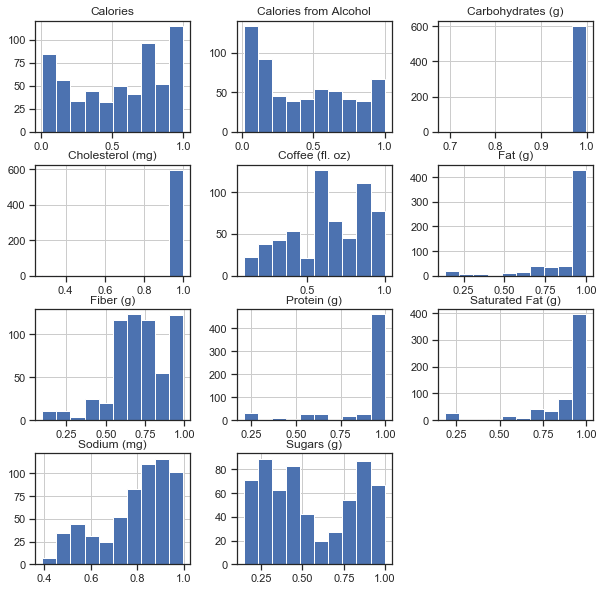

In [13]:
rm_corr_qval_df.hist(bins=10, figsize=(10,10))

In [14]:
rm_corr_qval_df.to_csv("shared_q_val.tsv", sep="\t")

### Now for exercise and sleep

In [15]:
subject1_df = pd.read_excel(data_path, sheet_name="log2_robust_spearman_p-vals")

In [16]:
subject1_qval_df = copy.deepcopy(subject1_df)
for column in subject1_df.columns:
    subject1_qval_df[column] = pg.fdr(subject1_df[column])[1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa248480ef0>,
      dtype=object)

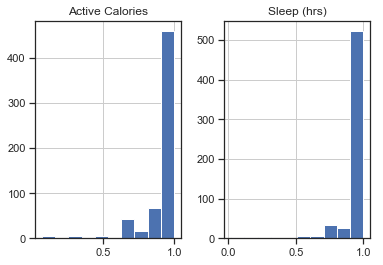

In [17]:
subject1_qval_df.hist(bins=10)

In [18]:
subject1_qval_df.to_csv("log2_robust_spearman_q-vals.tsv", sep="\t")